<img src='slides/29.png'>

In [1]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

iris = sns.load_dataset('iris')

# species 列を削除
X = iris.drop(['species'], axis=1)

# 標準化
# - 主成分分析では分散（平均値からのばらつき）を用いるため
#   標準化により平均値を 0 に揃える
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X)

# 標準化した DataFrame
X_std = pd.DataFrame(sc.transform(X), index=X.index, columns=X.columns)

### 全ての主成分の説明率

- 主成分はもとの説明変数と同数
- 各主成分が元のデータを説明する割合（説明率）

In [2]:
from sklearn.decomposition import PCA

# 主成分分析 PCA の初期化
# - n_components=None: 主成分はもとの説明変数と同数
pca = PCA(n_components=None)

# 学習結果を DataFrame
X_transformed = pd.DataFrame(pca.fit_transform(X_std))

# 結果
# - explained_variance_ratio_: 各主成分が元のデータを説明する割合
print('各次元の説明率: {}'.format(pca.explained_variance_ratio_))
print('累積説明率: {:.3f}'.format(sum(pca.explained_variance_ratio_)))

各次元の説明率: [0.72962445 0.22850762 0.03668922 0.00517871]
累積説明率: 1.000


### それぞれの主成分の分布

各次元の説明率: [0.72962445 0.22850762 0.03668922 0.00517871]


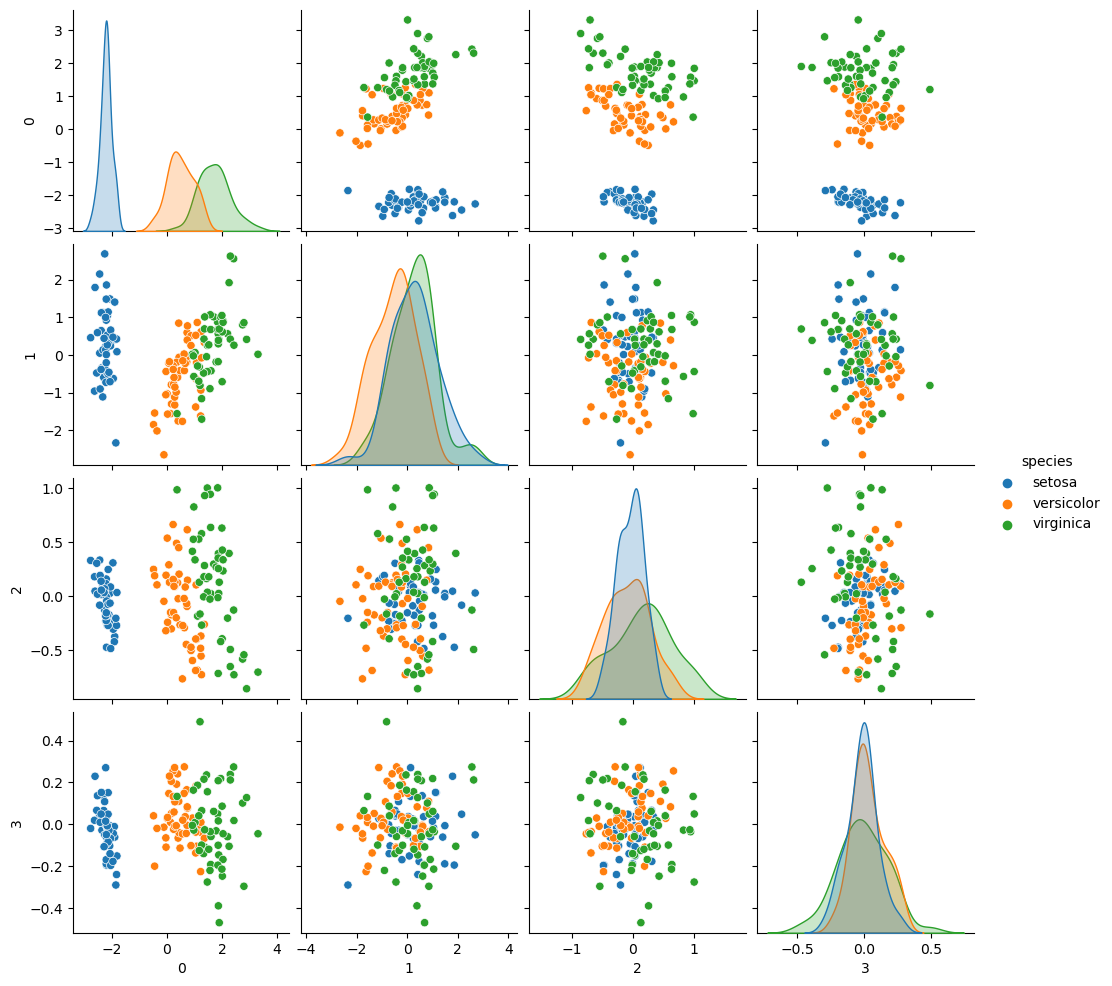

In [3]:
print('各次元の説明率: {}'.format(pca.explained_variance_ratio_))

# 主成分の散布図
df = X_transformed
df['species'] = iris['species']
sns.pairplot(df, hue='species')

# 2022年度 (matplotlib 3.5.2) では必要
plt.show()

### 説明変数と主成分の関係

説明変数と主成分との関係（説明変数への重み、主成分負荷量）は components_ に格納されている。

In [4]:
w = pd.DataFrame(pca.components_, columns=X.columns)
# 確認
w

,sepal_length,sepal_width,petal_length,petal_width
0,0.521066,-0.269347,0.580413,0.564857
1,0.377418,0.923296,0.024492,0.066942
2,-0.719566,0.244382,0.142126,0.634273
3,-0.261286,0.123510,0.801449,-0.523597


上記の説明変数への重みと説明変数を掛け合わせ、主成分分析により変換した結果と比較する。

In [5]:
w.dot(X_std.head(1).T).T

,0,1,2,3
0,-2.264703,0.480027,-0.127706,-0.024168


掛け合わせた結果は、主成分分析により変換した結果と一致する。

In [6]:
X_transformed.head(1)

,0,1,2,3,species
0,-2.264703,0.480027,-0.127706,-0.024168,setosa


#### 補足：行列の掛け算

In [7]:
w

,sepal_length,sepal_width,petal_length,petal_width
0,0.521066,-0.269347,0.580413,0.564857
1,0.377418,0.923296,0.024492,0.066942
2,-0.719566,0.244382,0.142126,0.634273
3,-0.261286,0.123510,0.801449,-0.523597


In [8]:
X_std.head(1).T

,0
sepal_length,-0.900681
sepal_width,1.019004
petal_length,-1.340227
petal_width,-1.315444


- w * X_std.head(1).T は、X_std.head(1).T を転置（縦横をひっくり返す）
- 各行について、各要素を掛け合わせた値の合計

In [9]:
0.521066*-0.900681 + -0.269347*1.019004 + 0.580413*-1.340227 + 0.564857*-1.315444

-2.264702841593

### K-Means によるクラスタリングの結果を比較

説明変数の数が多い場合、クラスタリングの結果を可視化することは困難になる。
15_1_scaling.ipynb では、分類の影響が大きい説明変数を用い散布図で可視化を行ったが、そのような説明変数が明らかではない場合は主成分を用いることもできる。

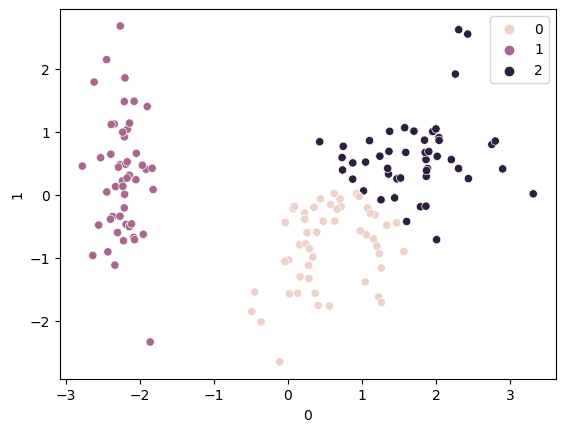

In [10]:
from sklearn.cluster import KMeans

# クラスタ数 3 で K-Means によりクラスタリング
model = KMeans(n_clusters=3)
model.fit(X_std)

# クラスタリング結果を散布図で描画
sns.scatterplot(x=X_transformed[0], y=X_transformed[1], hue=model.labels_)

# 2022年度 (matplotlib 3.5.2) では必要
plt.show()